# Comparisson of raw and ingested data

In this notebook, I'll load in the ingested .cdf file for the 11/2/2021 and the mpl .nc files from the raw data for the same day. I'll then plot their backscatters to see if they both look reasonbale, and also (somehow) compare the two datasets.

In [54]:
# initial imports

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import datetime

import os

In [2]:
# determining where files are and what files exist...

dir_target = '/home/users/eeasm/_scripts/ICESat2/src/mpl'

# directory containinng the converted raw .mpl files
dir_raw = os.path.join(dir_target, 'mpl')

## Opening the ingested file

In this section I will focus on opening the ingested file `smtmplpolX1.a1.20210211.000000.cdf` into an xarray format.

In [3]:
fname = 'calibration/smtmplpolX1.a1.20210211.000000.cdf'

ds_ingested = xr.open_dataset(os.path.join(dir_target, fname))
ds_ingested

<xarray.Dataset>
Dimensions:          (time: 17280, height: 1200)
Coordinates:
  * height           (height) float32 -2.998 -2.983 -2.968 ... 14.94 14.96 14.97
Dimensions without coordinates: time
Data variables: (12/19)
    base_time        datetime64[ns] ...
    time_offset      (time) timedelta64[ns] ...
    hour             (time) float32 ...
    nshots           (time) int32 ...
    rep_rate         (time) int32 ...
    energy           (time) float32 ...
    ...               ...
    initial_cbh      (time) float32 ...
    backscatter_1    (time, height) float32 ...
    backscatter_2    (time, height) float32 ...
    lat              float32 ...
    lon              float32 ...
    alt              float32 ...
Attributes:
    Date_created:              Mon Mar 01 16:43:44 2021 UTC
    Ingest_version:            $Id: dave_mpl.polarization.c,v 1.8 2015/09/24 ...
    comment:                   DOE Atmospheric Radiation Measurement (ARM) Mi...
    Author:                    Dave Turner, NOAA National Severe Storms Labor...
    instrument_serial_number:  108
    instrument_version:        413
    backscatter_comment:       See Flynn et al. 2007 Optics Express paper for...

In [22]:
for k in ds_ingested.keys():
    print(f'def ingested_{k}(dsl, **kwargs):')
    print('\tpass')

def ingested_base_time(dsl, **kwargs):
	pass
def ingested_time_offset(dsl, **kwargs):
	pass
def ingested_hour(dsl, **kwargs):
	pass
def ingested_nshots(dsl, **kwargs):
	pass
def ingested_rep_rate(dsl, **kwargs):
	pass
def ingested_energy(dsl, **kwargs):
	pass
def ingested_temp_detector(dsl, **kwargs):
	pass
def ingested_temp_telescope(dsl, **kwargs):
	pass
def ingested_temp_laser(dsl, **kwargs):
	pass
def ingested_mn_background_1(dsl, **kwargs):
	pass
def ingested_sd_background_1(dsl, **kwargs):
	pass
def ingested_mn_background_2(dsl, **kwargs):
	pass
def ingested_sd_background_2(dsl, **kwargs):
	pass
def ingested_initial_cbh(dsl, **kwargs):
	pass
def ingested_backscatter_1(dsl, **kwargs):
	pass
def ingested_backscatter_2(dsl, **kwargs):
	pass
def ingested_lat(dsl, **kwargs):
	pass
def ingested_lon(dsl, **kwargs):
	pass
def ingested_alt(dsl, **kwargs):
	pass


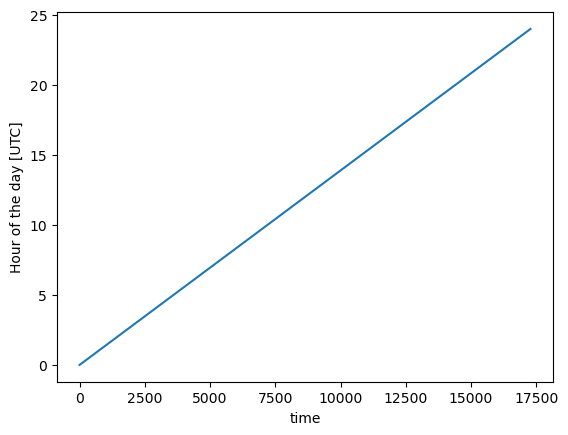

In [21]:
ds_ingested.hour.plot()

In [20]:
for k in ds_ingested.keys():
    print(f'\'{k}\': [{ds_ingested[k].dims}, {ds_ingested[k].dtype}, {ds_ingested[k].attrs}, None],')

'base_time': [(), datetime64[ns], {'long_name': 'Base time in Epoch'}, None],
'time_offset': [('time',), timedelta64[ns], {'long_name': 'Time offset from base_time'}, None],
'hour': [('time',), float32, {'long_name': 'Hour of the day', 'units': 'UTC'}, None],
'nshots': [('time',), int32, {'long_name': 'number of laser shots', 'units': 'unitless'}, None],
'rep_rate': [('time',), int32, {'long_name': 'laser pulse repetition frequency', 'units': 'Hz'}, None],
'energy': [('time',), float32, {'long_name': 'laser energy', 'units': 'microJoules'}, None],
'temp_detector': [('time',), float32, {'long_name': 'detector temperature', 'units': 'C'}, None],
'temp_telescope': [('time',), float32, {'long_name': 'telescope temperature', 'units': 'C'}, None],
'temp_laser': [('time',), float32, {'long_name': 'laser temperature', 'units': 'C'}, None],
'mn_background_1': [('time',), float32, {'long_name': 'mean background in channel 1', 'units': 'counts / microsecond'}, None],
'sd_background_1': [('time',)

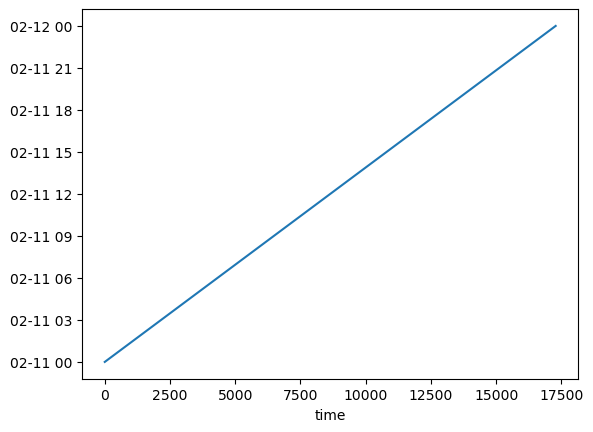

In [9]:
(ds_ingested.time_offset + ds_ingested.base_time).plot()

In [4]:
print([i for i in ds_ingested.keys()])

['base_time', 'time_offset', 'hour', 'nshots', 'rep_rate', 'energy', 'temp_detector', 'temp_telescope', 'temp_laser', 'mn_background_1', 'sd_background_1', 'mn_background_2', 'sd_background_2', 'initial_cbh', 'backscatter_1', 'backscatter_2', 'lat', 'lon', 'alt']


In [7]:
depol_MPL = ds_ingested['backscatter_1'] / ds_ingested['backscatter_2']
depol_linear = depol_MPL / (1-depol_MPL)

ds_ingested['depol_MPL'] = depol_MPL
ds_ingested['depol_linear'] = depol_linear

plotting backscatter_1
plotting backscatter_2
plotting depol_MPL
plotting depol_linear


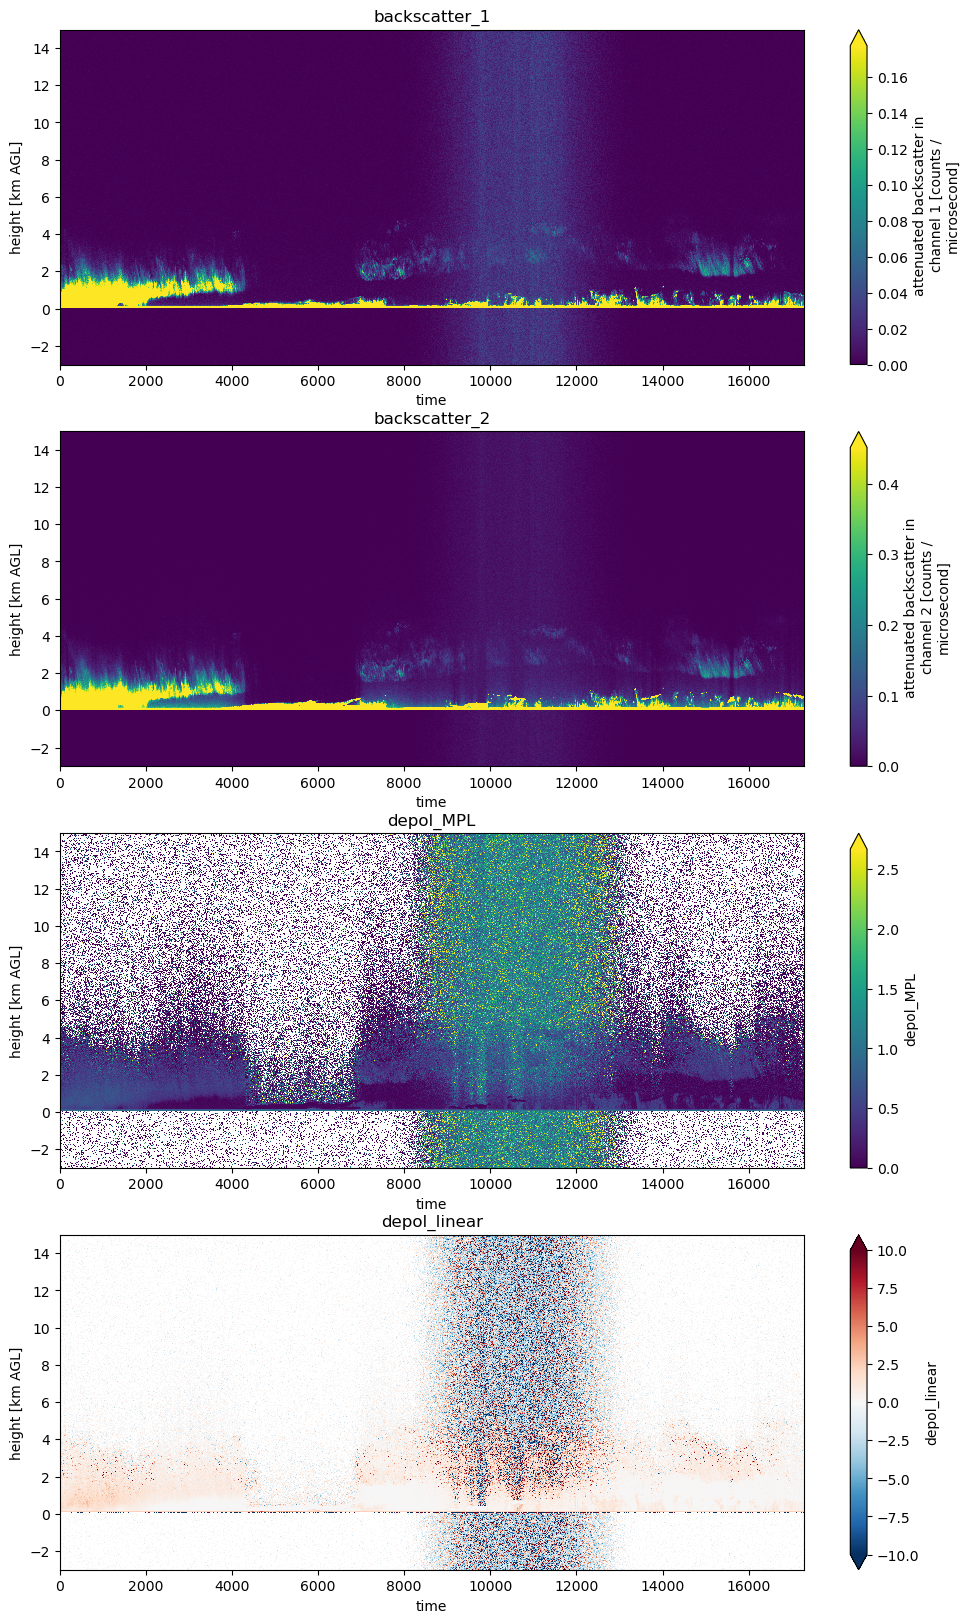

In [8]:
fig, axs = plt.subplots(4,1,figsize=(12,20))

plottables = ['backscatter_1', 'backscatter_2', 'depol_MPL', 'depol_linear']

for i,p in enumerate(plottables):
    print(f'plotting {p}')
    ds_ingested[p].plot(x='time',y='height',ax=axs[i],robust=True)
    axs[i].set_title(p)

plt.show()

# Opening the converted raw files

In this section I'll focus on loading in the files generated from the raw .mpl data, and plotting their similar characteristics.

In [7]:
# testing opening one of the files
fname0 = '202102110000..nc'
ds_raw1 = xr.open_dataset(os.path.join(dir_raw, fname0))
ds_raw1

<xarray.Dataset>
Dimensions:                      (profile: 720, range: 1999)
Dimensions without coordinates: profile, range
Data variables: (12/52)
    unit                         (profile) float32 ...
    version                      (profile) float32 ...
    shots_sum                    (profile) float64 ...
    trigger_frequency            (profile) float64 ...
    energy_monitor               (profile) float64 ...
    temp_0                       (profile) float64 ...
    ...                           ...
    channel_2                    (profile, range) float32 ...
    time_utc                     (profile) object ...
    time                         (profile) datetime64[ns] ...
    c                            float64 ...
    nrb_copol                    (profile, range) float64 ...
    nrb_crosspol                 (profile, range) float64 ...
Attributes:
    created:   2023-01-26T:14:28:15Z
    software:  mpl2nc (https://github.com/peterkuma/mpl2nc)
    version:   1.3.5

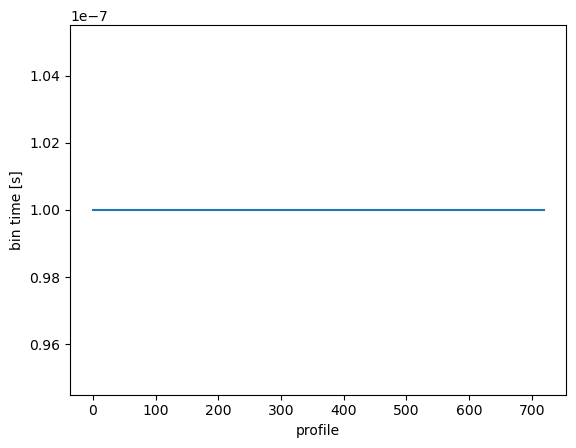

In [10]:
ds_raw1.bin_time.plot()

In [8]:
depol_MPL = ds_raw1['channel_1'] / ds_raw1['channel_2']
depol_linear = depol_MPL / (1-depol_MPL)

ds_raw1['depol_MPL'] = depol_MPL
ds_raw1['depol_linear'] = depol_linear

plotting channel_1
plotting channel_2
plotting depol_MPL
plotting depol_linear


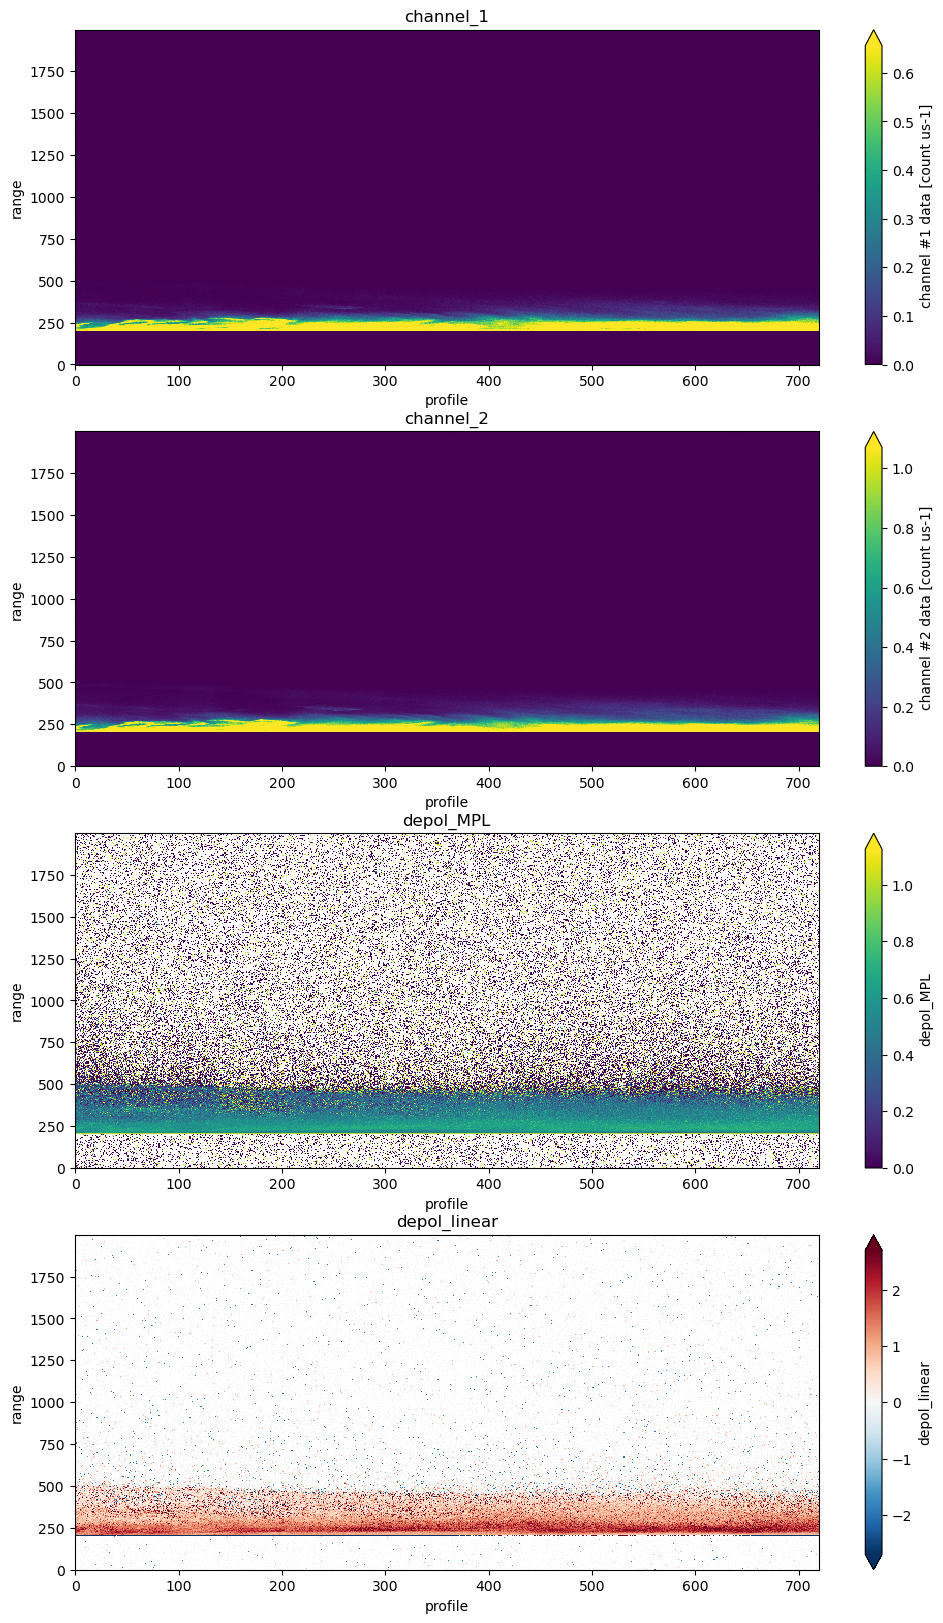

In [9]:
fig, axs = plt.subplots(4,1,figsize=(12,20))

plottables = ['channel_1', 'channel_2', 'depol_MPL', 'depol_linear']

for i,p in enumerate(plottables):
    print(f'plotting {p}')
    ds_raw1[p].plot(x='profile',ax=axs[i],robust=True)
    axs[i].set_title(p)

plt.show()

# Full raw dataset

In [4]:
ds_raw = xr.open_mfdataset(dir_raw + '/*.nc', combine='nested',concat_dim='profile')
ds_raw

<xarray.Dataset>
Dimensions:                      (profile: 17280, range: 1999)
Dimensions without coordinates: profile, range
Data variables: (12/52)
    unit                         (profile) float32 dask.array<chunksize=(720,), meta=np.ndarray>
    version                      (profile) float32 dask.array<chunksize=(720,), meta=np.ndarray>
    shots_sum                    (profile) float64 dask.array<chunksize=(720,), meta=np.ndarray>
    trigger_frequency            (profile) float64 dask.array<chunksize=(720,), meta=np.ndarray>
    energy_monitor               (profile) float64 dask.array<chunksize=(720,), meta=np.ndarray>
    temp_0                       (profile) float64 dask.array<chunksize=(720,), meta=np.ndarray>
    ...                           ...
    channel_2                    (profile, range) float32 dask.array<chunksize=(720, 1999), meta=np.ndarray>
    time_utc                     (profile) object dask.array<chunksize=(720,), meta=np.ndarray>
    time                         (profile) datetime64[ns] dask.array<chunksize=(720,), meta=np.ndarray>
    c                            (profile) float64 2.998e+08 ... 2.998e+08
    nrb_copol                    (profile, range) float64 dask.array<chunksize=(720, 1999), meta=np.ndarray>
    nrb_crosspol                 (profile, range) float64 dask.array<chunksize=(720, 1999), meta=np.ndarray>
Attributes:
    created:   2023-01-27T:13:33:17Z
    software:  mpl2nc (https://github.com/peterkuma/mpl2nc)
    version:   1.3.5

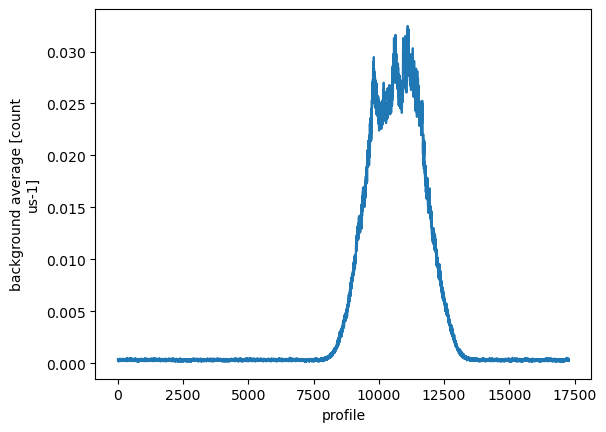

In [25]:
ds_raw.background_average.plot()

In [30]:
depol_MPL = ds_raw['channel_1'] / ds_raw['channel_2']
depol_MPL = depol_MPL.where(depol_MPL < 0.999, 0.999)

depol_linear = depol_MPL / (1-depol_MPL)

ds_raw['depol_MPL'] = depol_MPL
ds_raw['depol_linear'] = depol_linear

plotting channel_1
plotting channel_2
plotting depol_MPL


/home/users/eeasm/.conda/envs/icesat_summit/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/users/eeasm/.conda/envs/icesat_summit/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


plotting depol_linear


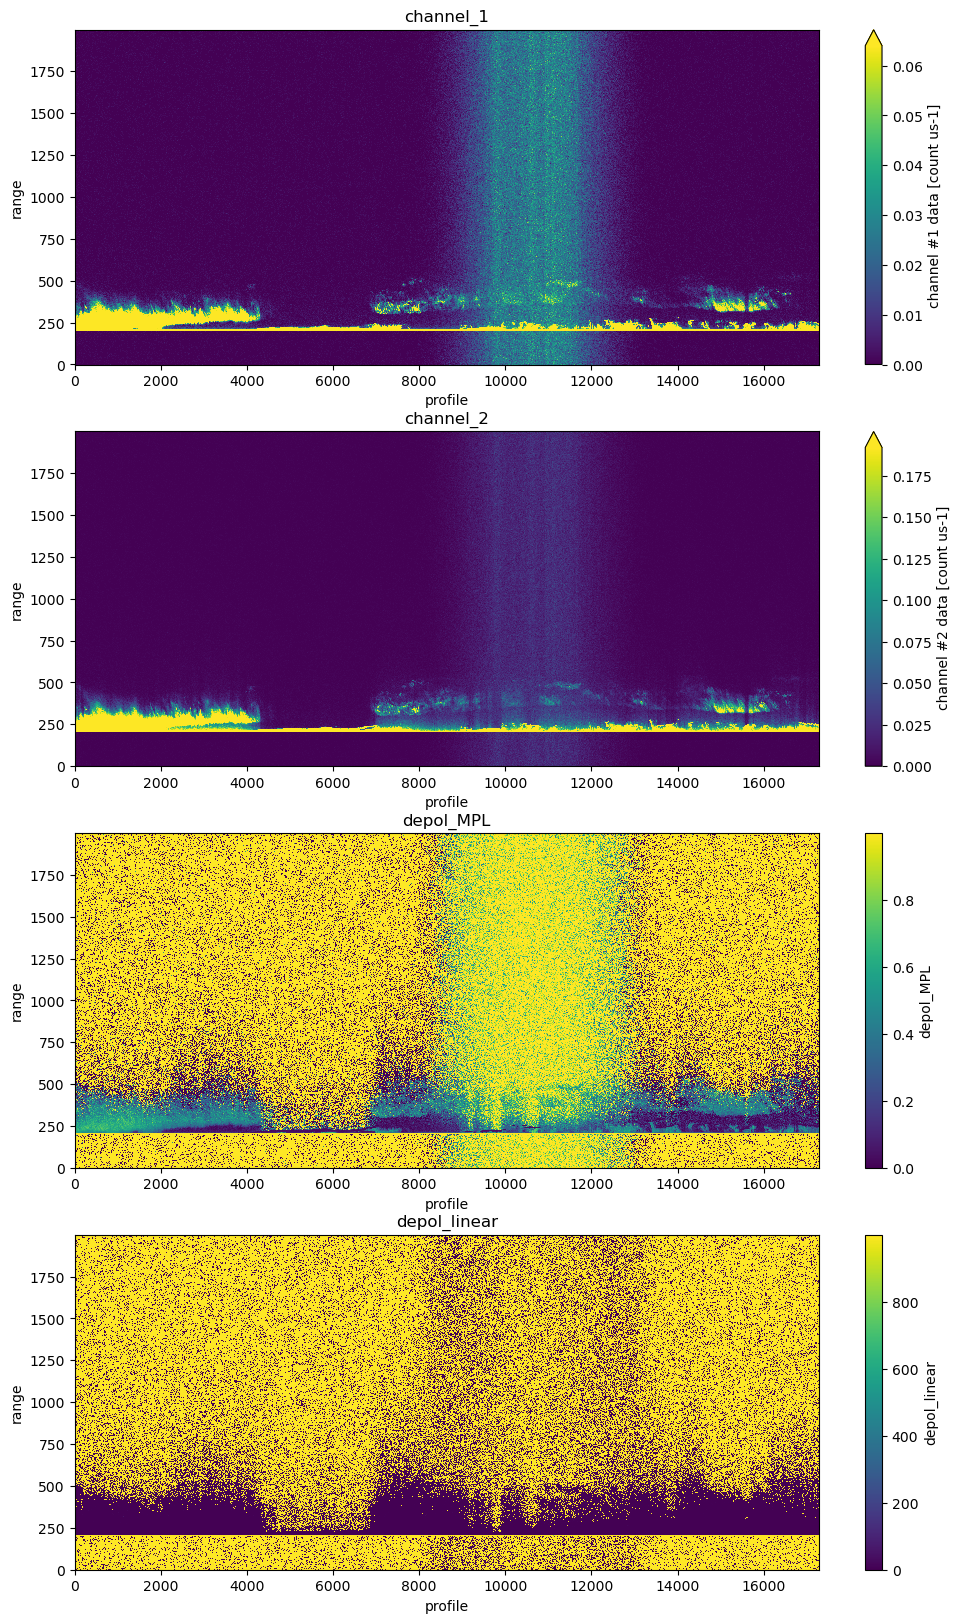

In [31]:
fig, axs = plt.subplots(4,1,figsize=(12,20))

plottables = ['channel_1', 'channel_2', 'depol_MPL', 'depol_linear']

for i,p in enumerate(plottables):
    print(f'plotting {p}')
    ds_raw[p].plot(x='profile',ax=axs[i],robust=True)
    axs[i].set_title(p)

plt.show()

plotting channel_1
plotting channel_2
plotting depol_MPL


/home/users/eeasm/.conda/envs/icesat_summit/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/users/eeasm/.conda/envs/icesat_summit/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


plotting depol_linear


/home/users/eeasm/.conda/envs/icesat_summit/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/users/eeasm/.conda/envs/icesat_summit/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


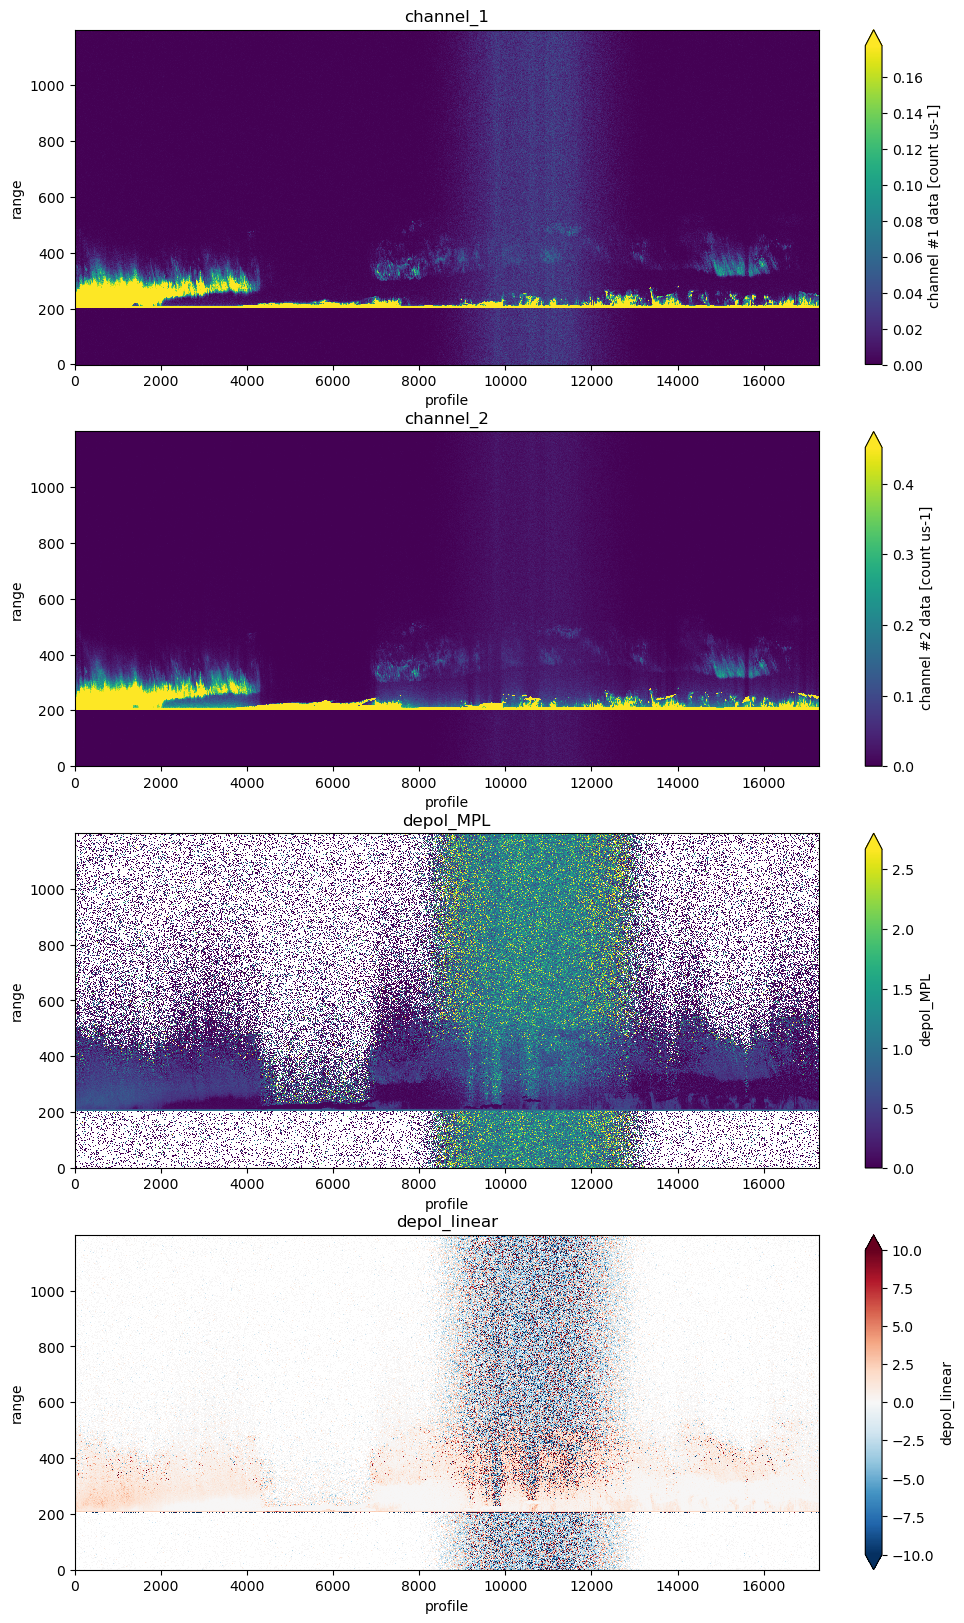

In [9]:
fig, axs = plt.subplots(4,1,figsize=(12,20))

plottables = ['channel_1', 'channel_2', 'depol_MPL', 'depol_linear']

for i,p in enumerate(plottables):
    print(f'plotting {p}')
    ds_raw.where(ds_raw.range < 1200,drop=True)[p].plot(x='profile',ax=axs[i],robust=True)
    axs[i].set_title(p)

plt.show()

# Direct comparison

In this section, I'll take the range-limitted `ds_raw` and the `ds_ingested` variables and determine the difference between their channel values. I'l then plot these.

In [17]:
diff1 = (ds_raw.where(ds_raw.range < 1200, drop=True)['channel_1'].values - ds_ingested['backscatter_1'].values)
diff2 = (ds_raw.where(ds_raw.range < 1200, drop=True)['channel_2'].values - ds_ingested['backscatter_2'].values)

In [18]:
diff1 = xr.ones_like(ds_ingested['backscatter_1']) * diff1
diff2 = xr.ones_like(ds_ingested['backscatter_2']) * diff2

Plotted diff1
Plotted diff2


<function matplotlib.pyplot.show(close=None, block=None)>

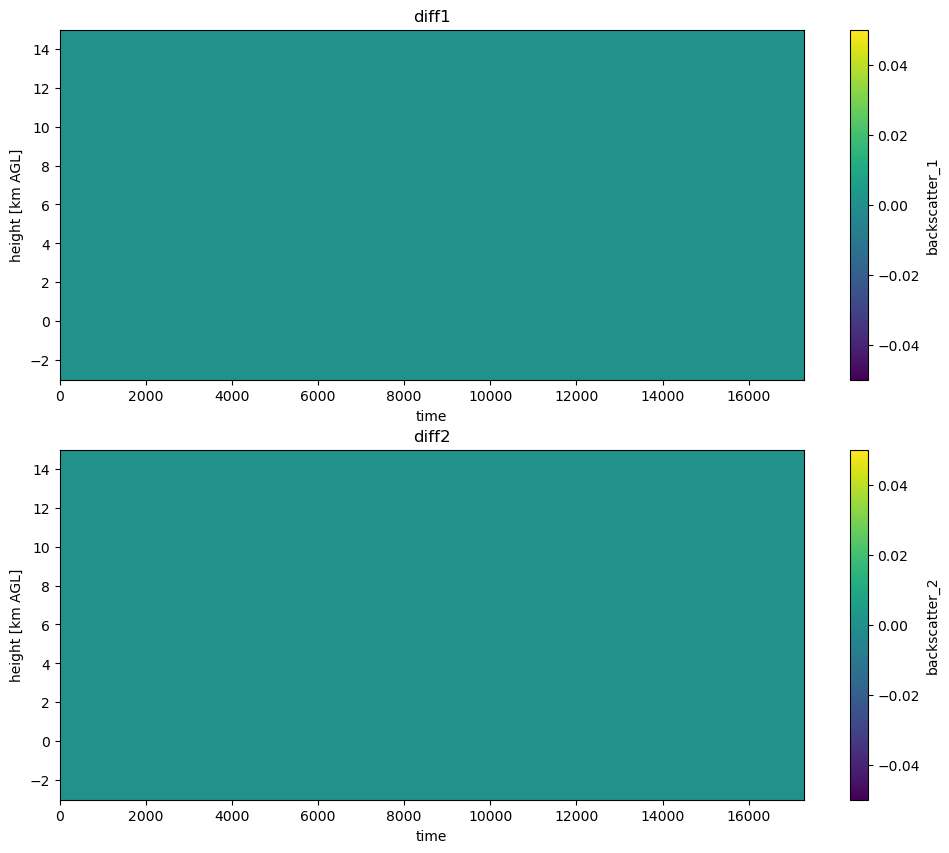

In [21]:
fig, axs = plt.subplots(2,1,figsize=(12,10))

for i,p in enumerate([diff1, diff2]):
    p.plot(x='time',ax=axs[i])
    axs[i].set_title(f'diff{i+1}')
    print(f'Plotted diff{i+1}')

plt.show

In [26]:
print(f'diff1: min={np.min(diff1.values):.15f} ; max={np.max(diff1.values):.15f}')
print(f'diff2: min={np.min(diff2.values):.15f} ; max={np.max(diff2.values):.15f}')

diff1: min=0.000000000000000 ; max=0.000000000000000
diff2: min=0.000000000000000 ; max=0.000000000000000


# Temperature variables

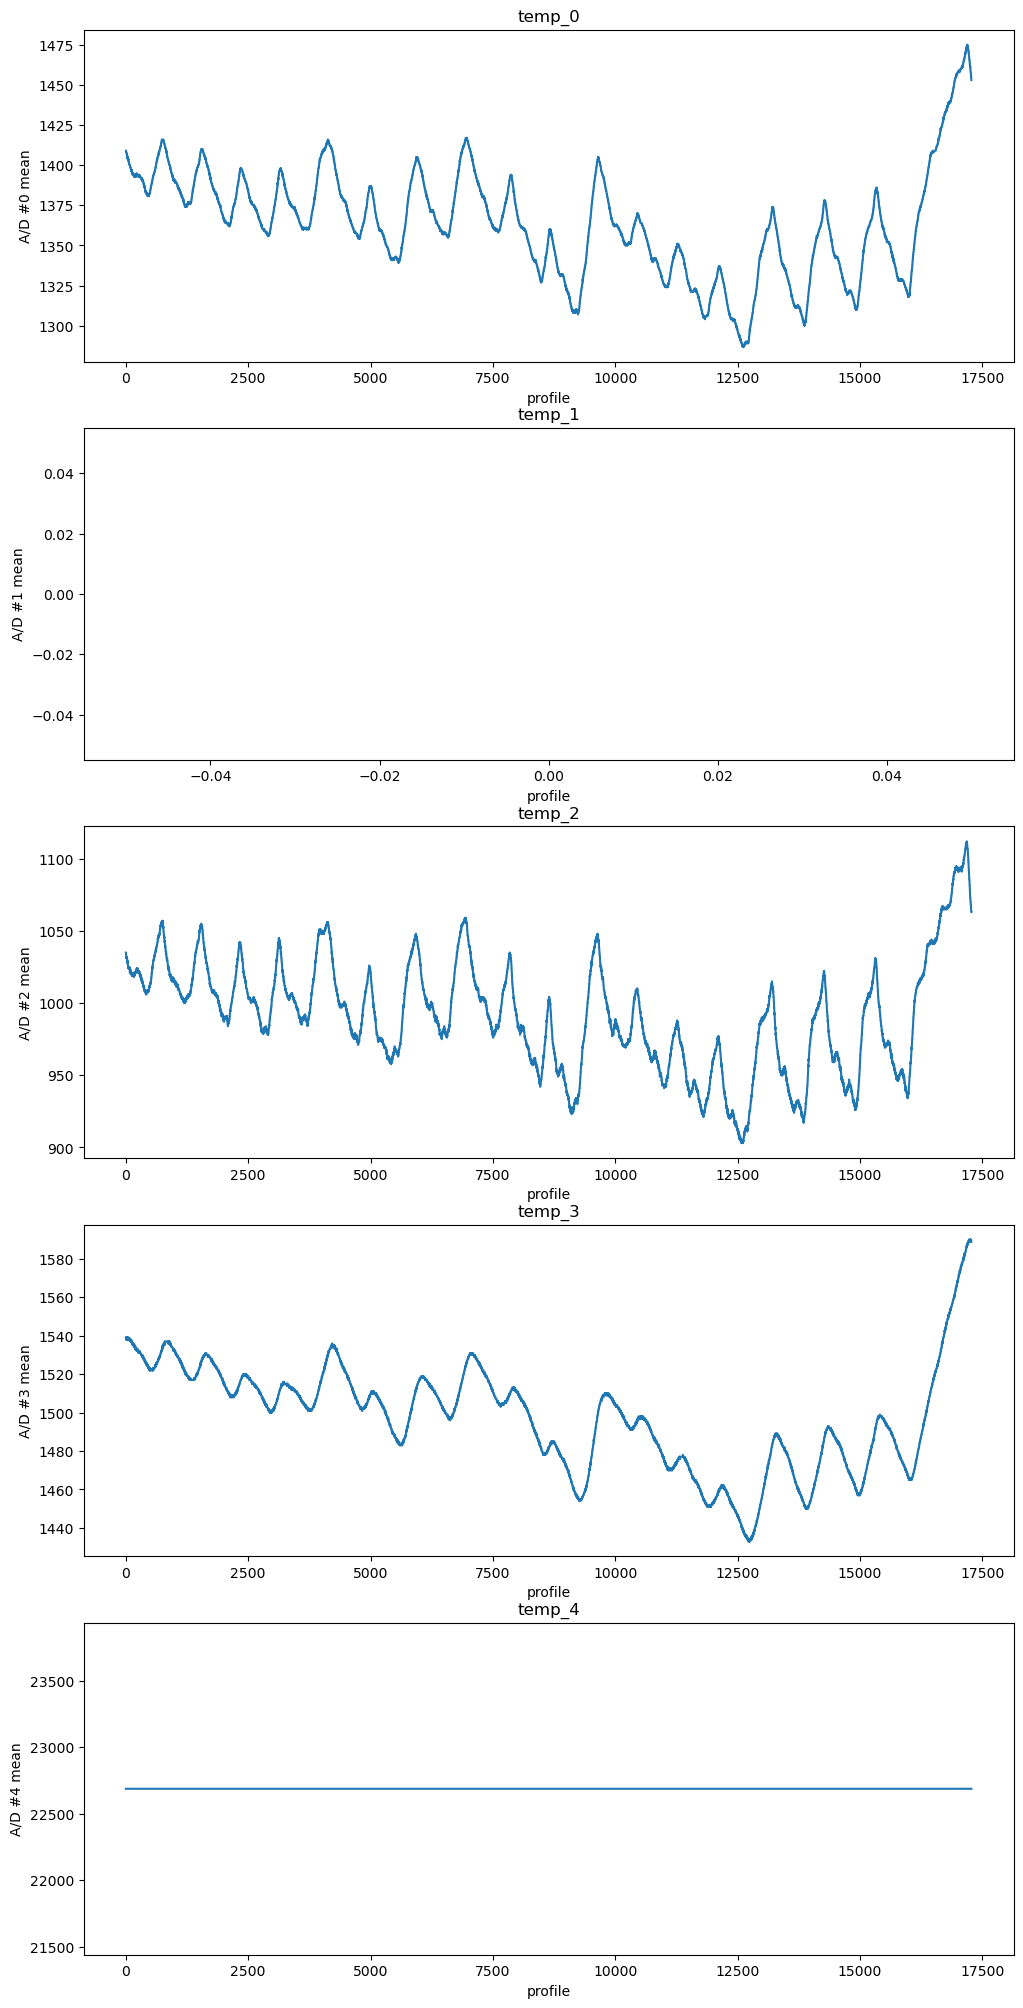

In [38]:
fig, axs = plt.subplots(5,1,figsize=(12,25))

for i in range(5):
    ds_raw[f'temp_{i}'].plot(x='profile', ax=axs[i])
    axs[i].set_title(f'temp_{i}')

plt.show()

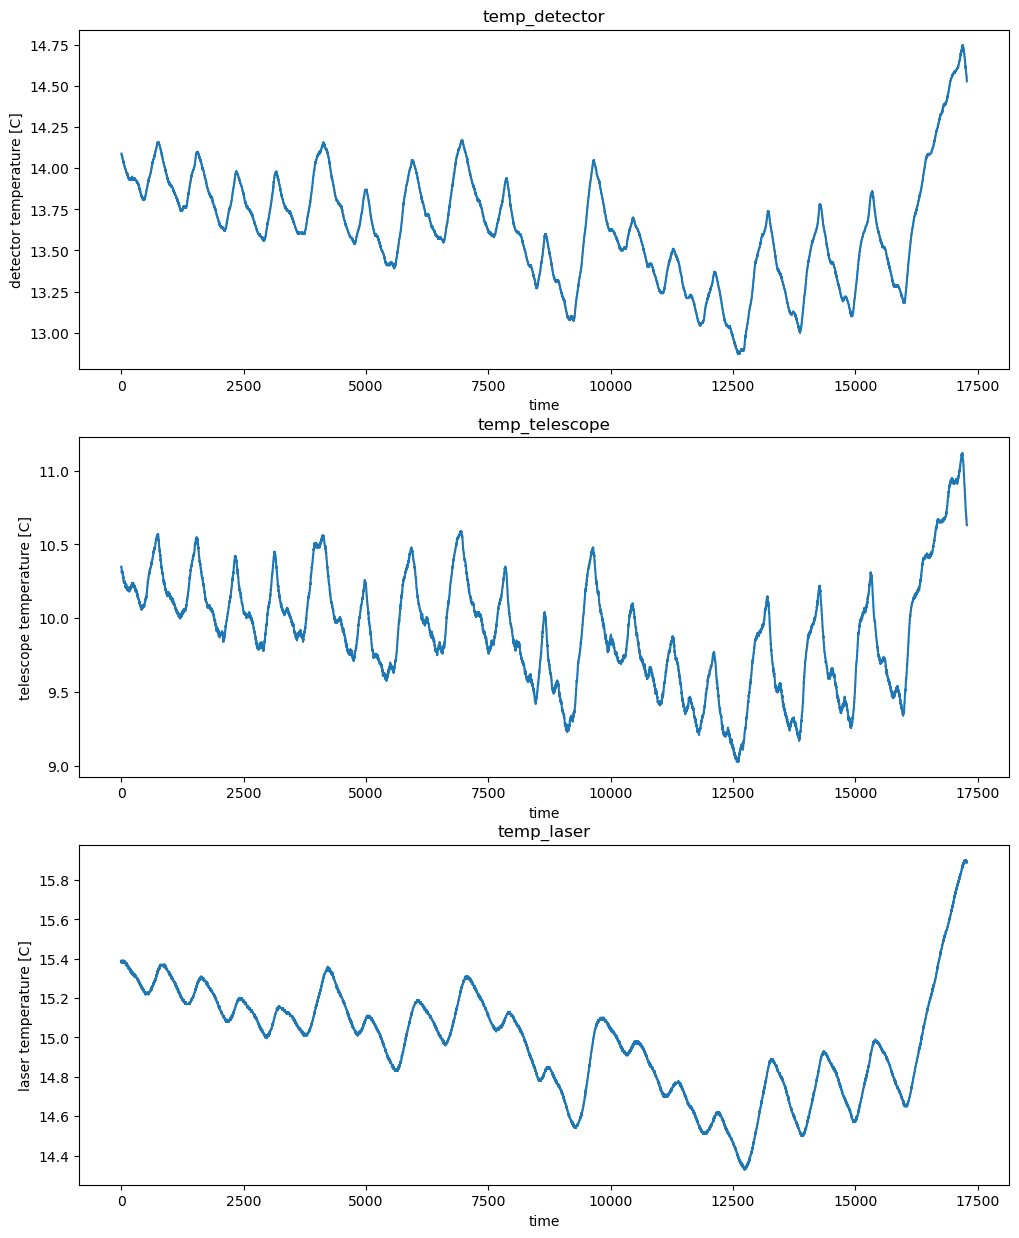

In [39]:
fig, axs = plt.subplots(3,1,figsize=(12,15))

plottables = ['temp_detector', 'temp_telescope', 'temp_laser']

for i,p in enumerate(plottables):
    ds_ingested[p].plot(x='time',ax=axs[i])
    axs[i].set_title(p)

plt.show()

In [77]:
# temperature variables
s1 = np.max(ds_ingested['temp_detector'].values) / np.max(ds_raw['temp_0'].values)
s2 = np.max(ds_ingested['temp_telescope'].values) / np.max(ds_raw['temp_2'].values)
s3 = np.max(ds_ingested['temp_laser'].values) / np.max(ds_raw['temp_3'].values)

dt1 = ds_raw['temp_0'].values/s1 * ds_ingested['temp_detector'].values

dt2 = ds_raw['temp_2'].values/s2 * ds_ingested['temp_telescope'].values

dt3 = ds_raw['temp_3'].values/s3 * ds_ingested['temp_laser'].values

print(dt3.shape)

(17280,)


In [83]:
td = np.max(ds_ingested['temp_detector'].values)
tt = np.max(ds_ingested['temp_telescope'].values)
tl = np.max(ds_ingested['temp_laser'].values)

degree_to_kelvin = lambda x: x+273.15
degree_to_farenheit = lambda x: (x * 1.8) + 32
scale_1000 = lambda x: x*100


td = scale_1000(td)
tt = scale_1000(tt)
tl = scale_1000(tl)

dt1 = ds_raw['temp_0'].values / td

dt2 = ds_raw['temp_2'].values / tt

dt3 = ds_raw['temp_3'].values / tl

(17280,)


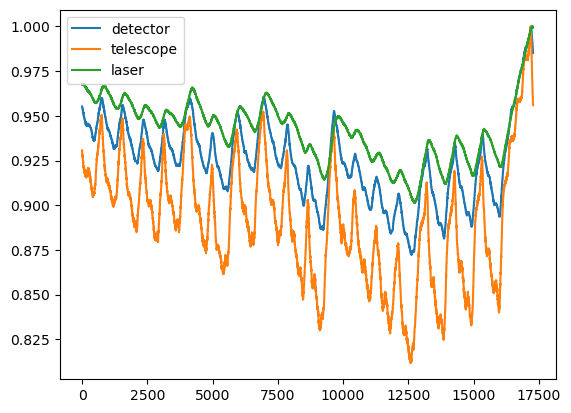

In [84]:
x = ds_raw['profile'].values
print(x.shape)

plt.plot(x,dt1, label='detector')
plt.plot(x,dt2, label='telescope')
plt.plot(x,dt3, label='laser')

plt.legend()


# Heights vs range

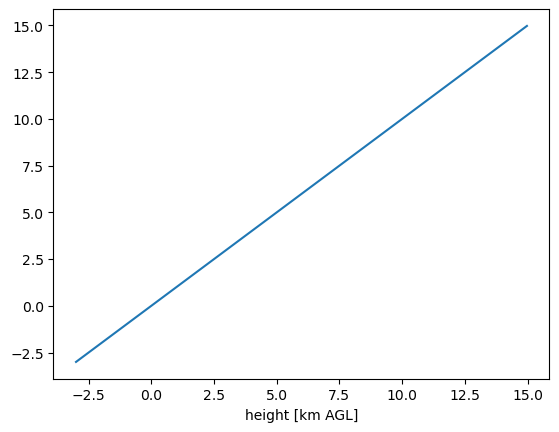

In [12]:
ranges_ = xr.ones_like(ds_ingested.height)
m = ranges_.shape

c = 299792458#3e8

range_ = ranges_* 0.5*ds_raw['bin_time'][0]*c*(np.arange(m[0]))*1e-3 - 3

range_.plot()

-0.00207538496596138
1.0000000137607934


/home/users/eeasm/.conda/envs/icesat_summit/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/users/eeasm/.conda/envs/icesat_summit/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


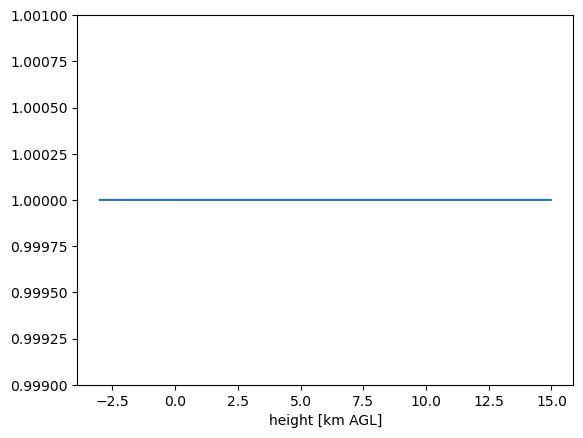

In [13]:
# range_ = m*height + c
c = range_.where(range_.height == 0, drop=True).values[0]
print(c)

m = (range_ - c) / range_.height

m.plot(ylim=[0.999,1.001])
print(m.mean(dim='height').values)

# mn_background ingestion

How is the mn_background variable ingested from the raw data?

+ mn_background_1: `ds_raw.background_average.values`
+ mn_background_2: `ds_raw.background_average_2.values`

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


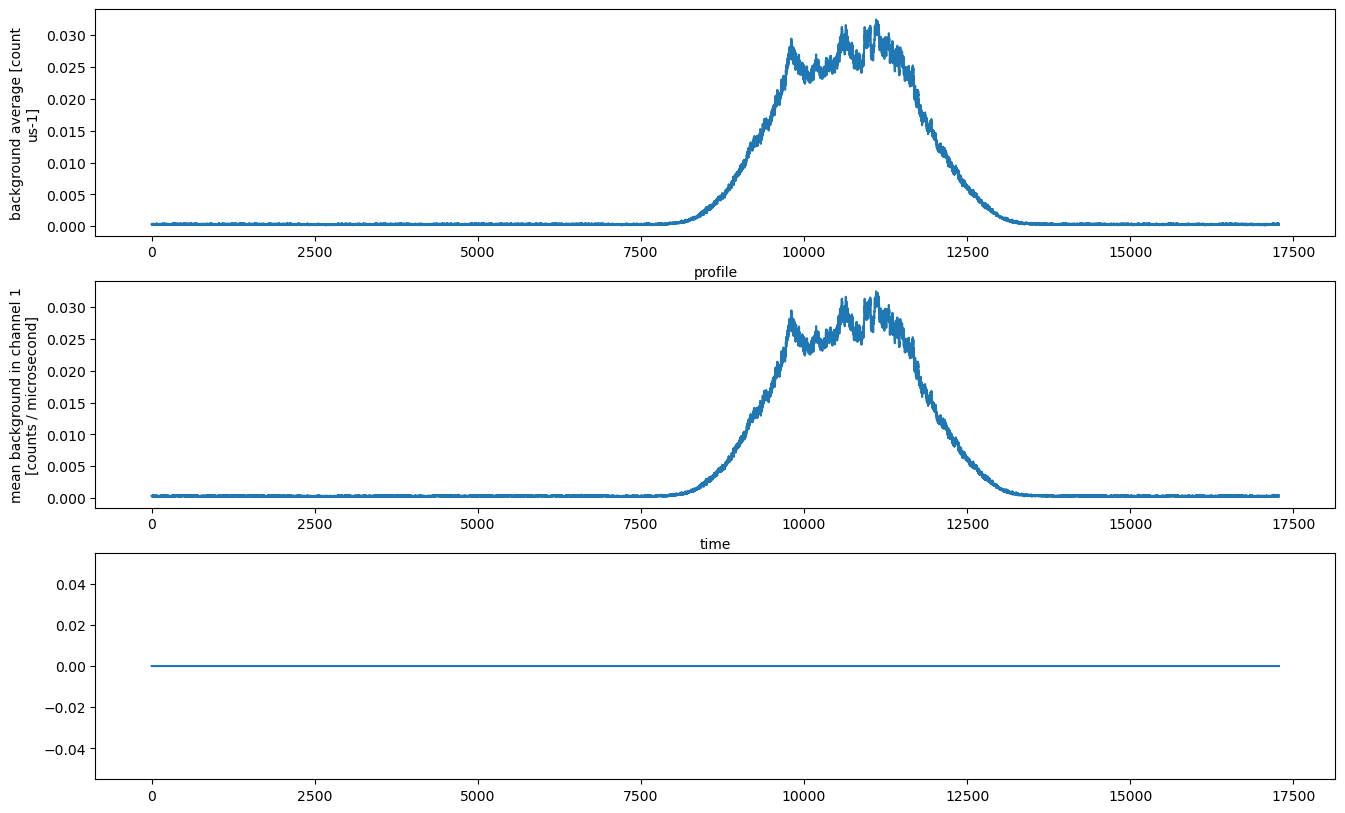

In [13]:
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw.background_average.plot(ax=axs[0])
ds_ingested.mn_background_1.plot(ax=axs[1])

vals = (ds_raw.background_average.values - ds_ingested.mn_background_1.values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


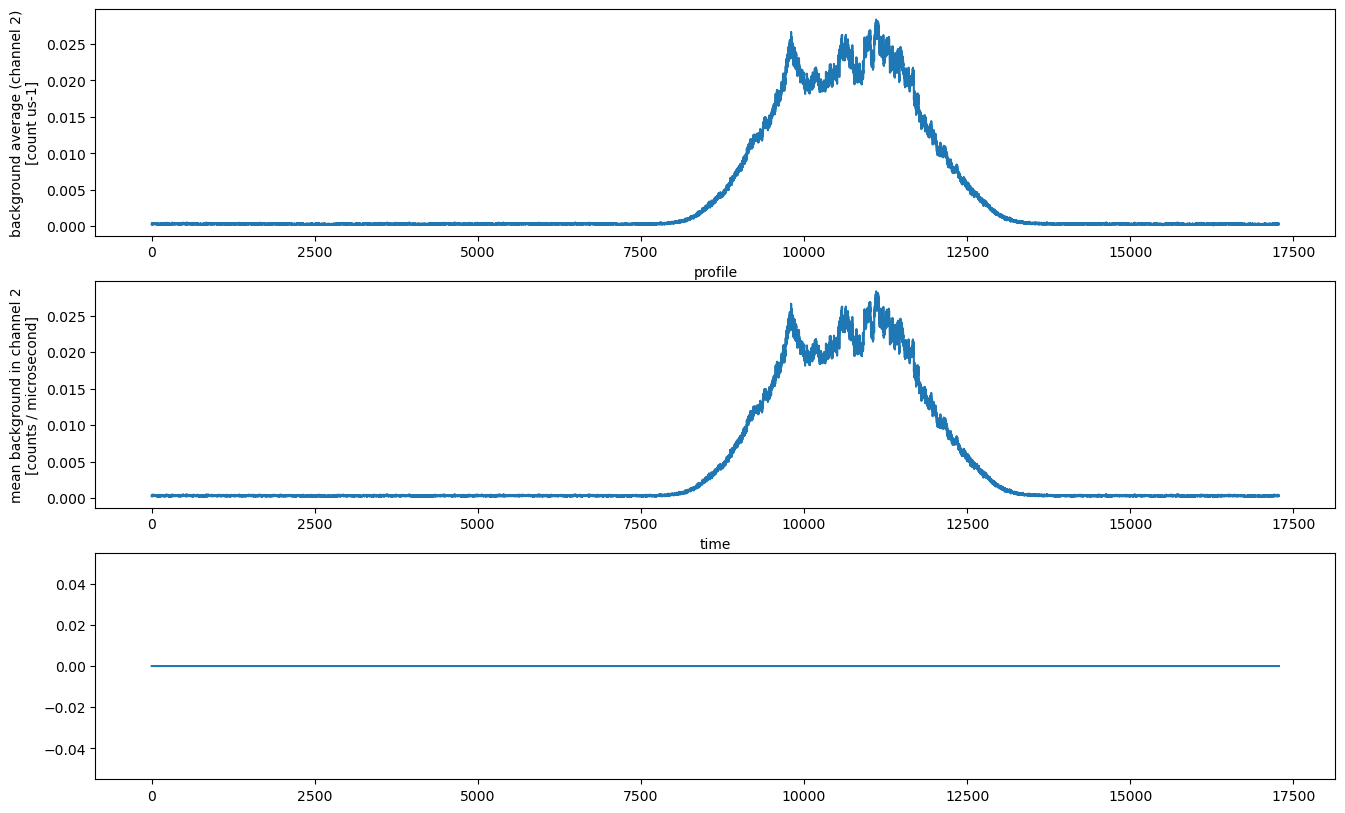

In [16]:
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw.background_average_2.plot(ax=axs[0])
ds_ingested.mn_background_2.plot(ax=axs[1])

vals = (ds_raw.background_average_2.values - ds_ingested.mn_background_2.values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

# sd_background ingestion

+ sd_background_1 : `ds_raw.background_stddev.values`
+ sd_background_2 : `ds_raw.background_stddev_2.values`

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


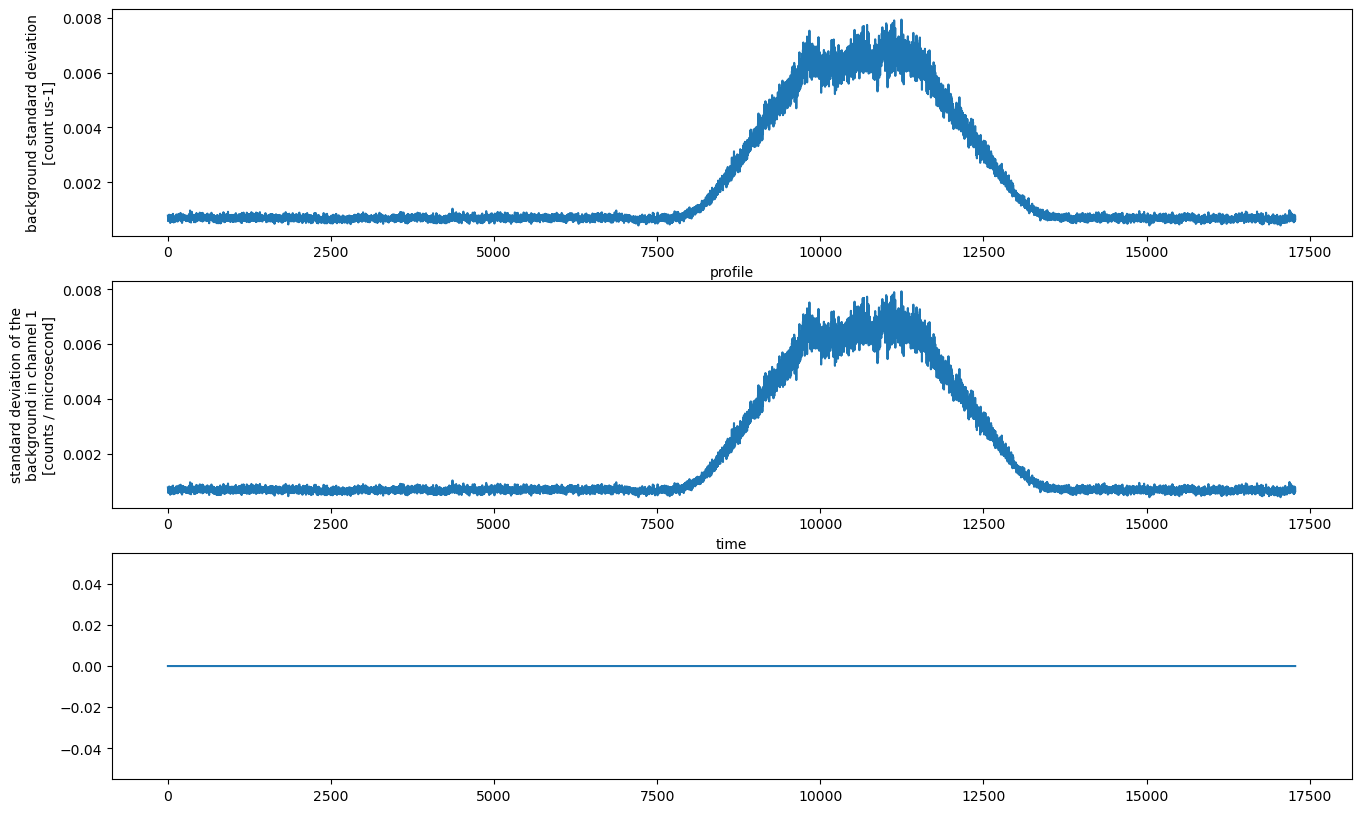

In [17]:
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw.background_stddev.plot(ax=axs[0])
ds_ingested.sd_background_1.plot(ax=axs[1])

vals = (ds_raw.background_stddev.values - ds_ingested.sd_background_1.values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


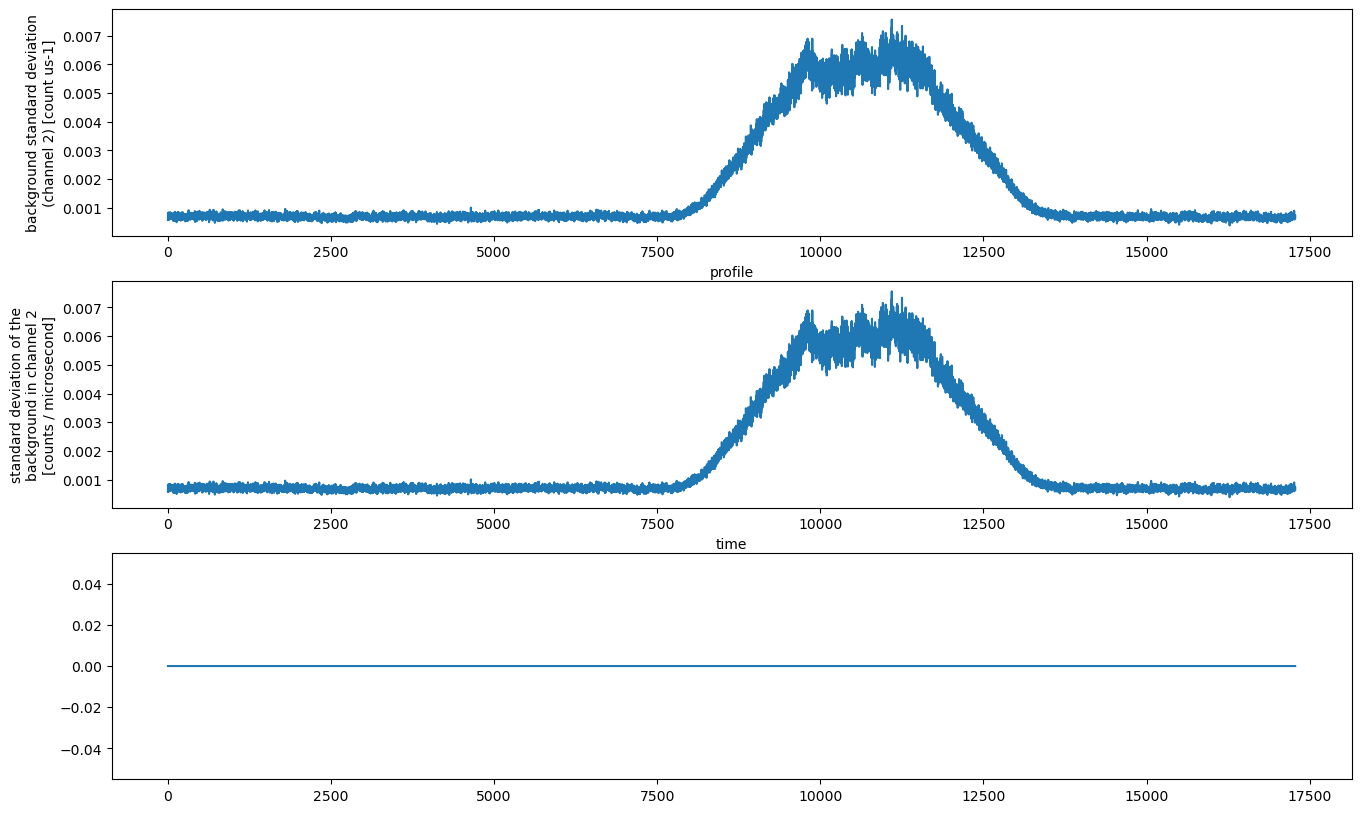

In [18]:
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw.background_stddev_2.plot(ax=axs[0])
ds_ingested.sd_background_2.plot(ax=axs[1])

vals = (ds_raw.background_stddev_2.values - ds_ingested.sd_background_2.values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

# initial_cbh ingestion

The value appears to be uniformly 0, so just need to pick an arbitrary field to multiply by 0

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


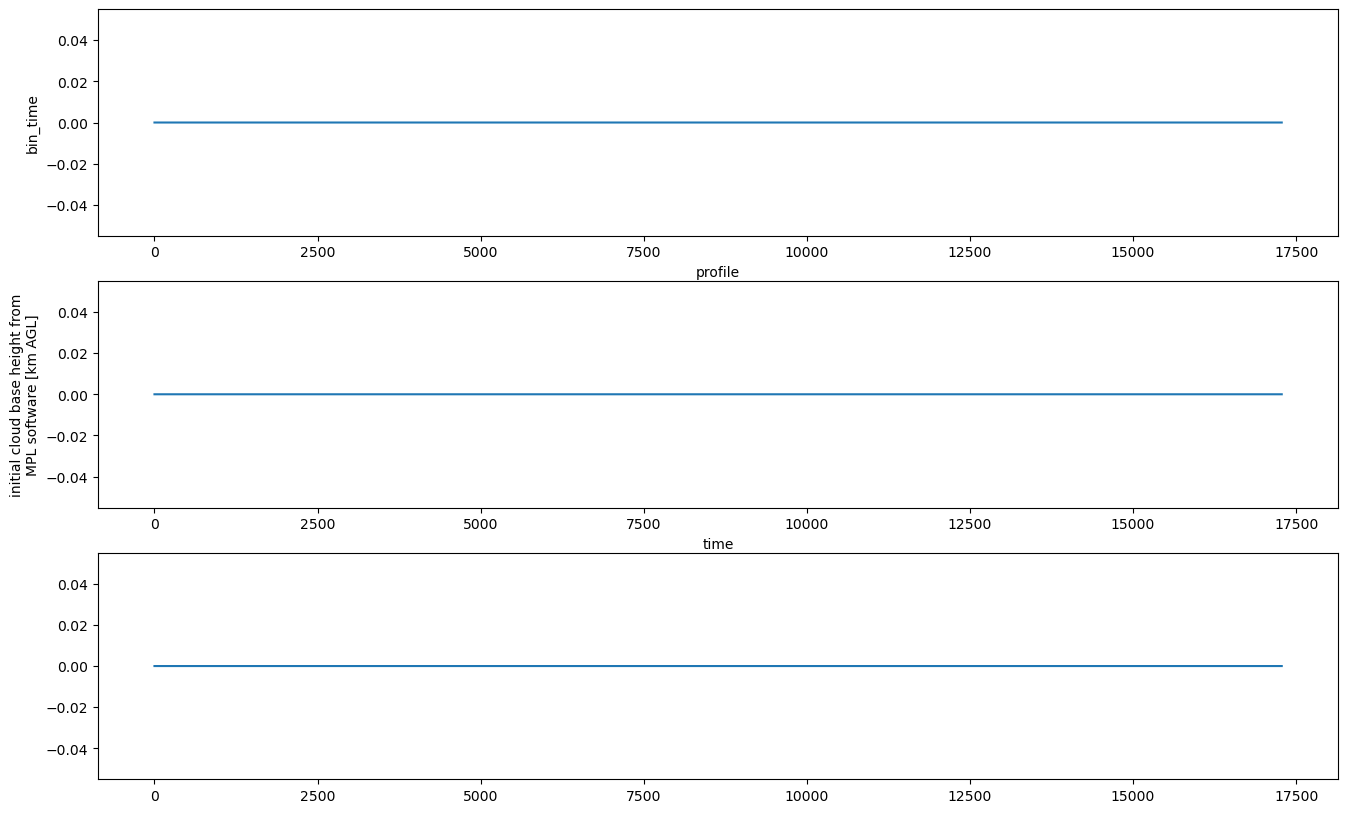

In [20]:
fig, axs= plt.subplots(3,1,figsize=(16,10))
(ds_raw.bin_time * 0).plot(ax=axs[0])
ds_ingested.initial_cbh.plot(ax=axs[1])

vals = (ds_raw.bin_time.values*0 - ds_ingested.initial_cbh.values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

# lat, lon, alt ingestion

+ lat : `72.59622`
+ lon : `-38.42197`
+ alt : `ds_raw.bin_time.values * 0`

In [25]:

#(ds_raw.gps_latitude).plot(ax=axs[0])
print(ds_ingested.lat.values)#.plot(ax=axs[1])

vals = (ds_raw.gps_latitude.values - ds_ingested.lat.values)
#axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

72.59622
difference: max = nan
difference: min = nan


In [26]:
#(ds_raw.gps_latitude).plot(ax=axs[0])
print(ds_ingested.lon.values)#.plot(ax=axs[1])

vals = (ds_raw.gps_longitude.values - ds_ingested.lon.values)
#axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

-38.42197
difference: max = nan
difference: min = nan


3200.0
difference: max = -3200.0000000000000000
difference: min = -3200.0000000000000000


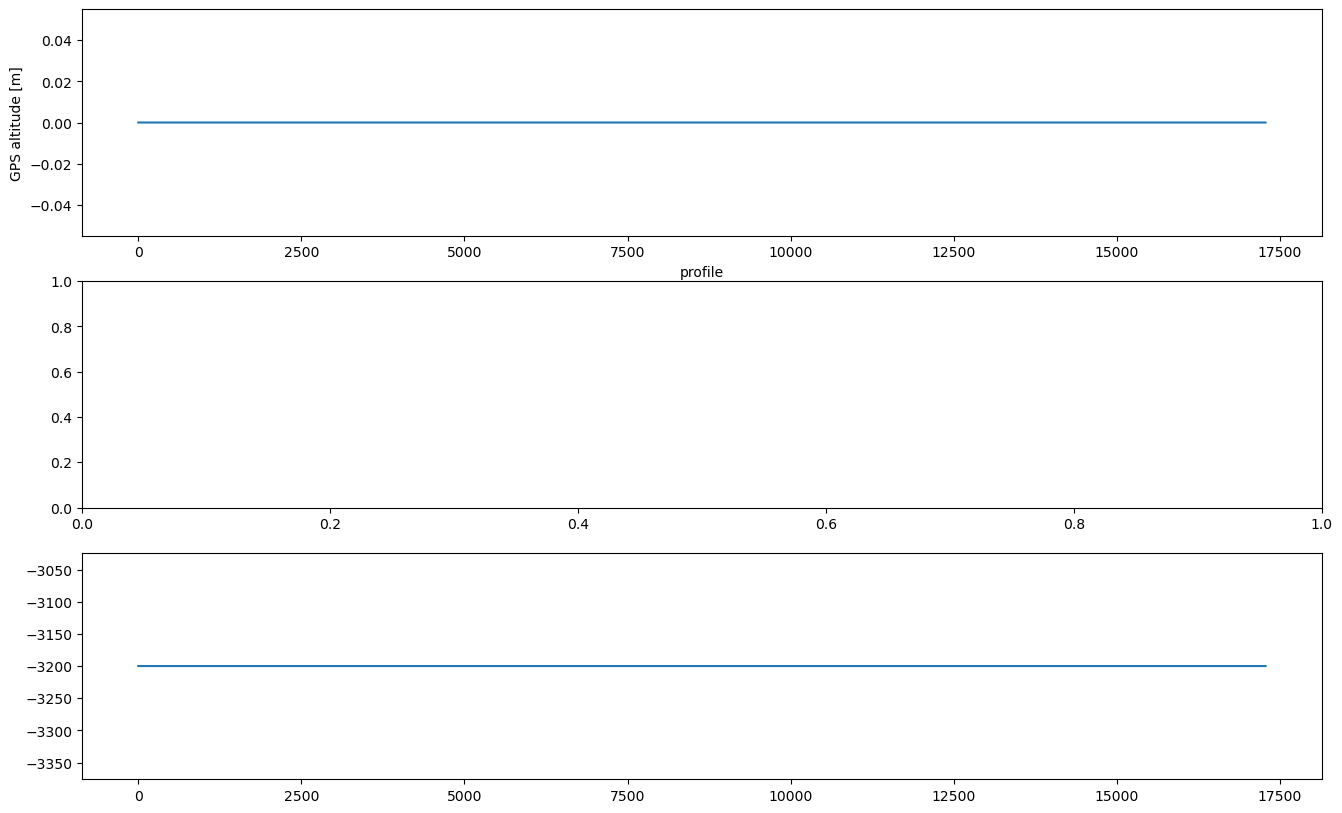

In [29]:
fig, axs= plt.subplots(3,1,figsize=(16,10))
(ds_raw.gps_altitude).plot(ax=axs[0])
print(ds_ingested.alt.values)#.plot(ax=axs[1])

vals = (ds_raw.gps_altitude.values - ds_ingested.alt.values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

# energy ingestion

+ energy : `ds_raw.energy_monitor.values / 1000`

NOTE: This isn't exact, but the residual is ~O(2e-7) (pretty small)

difference: max = 0.0000002365112302
difference: min = -0.0000002365112302


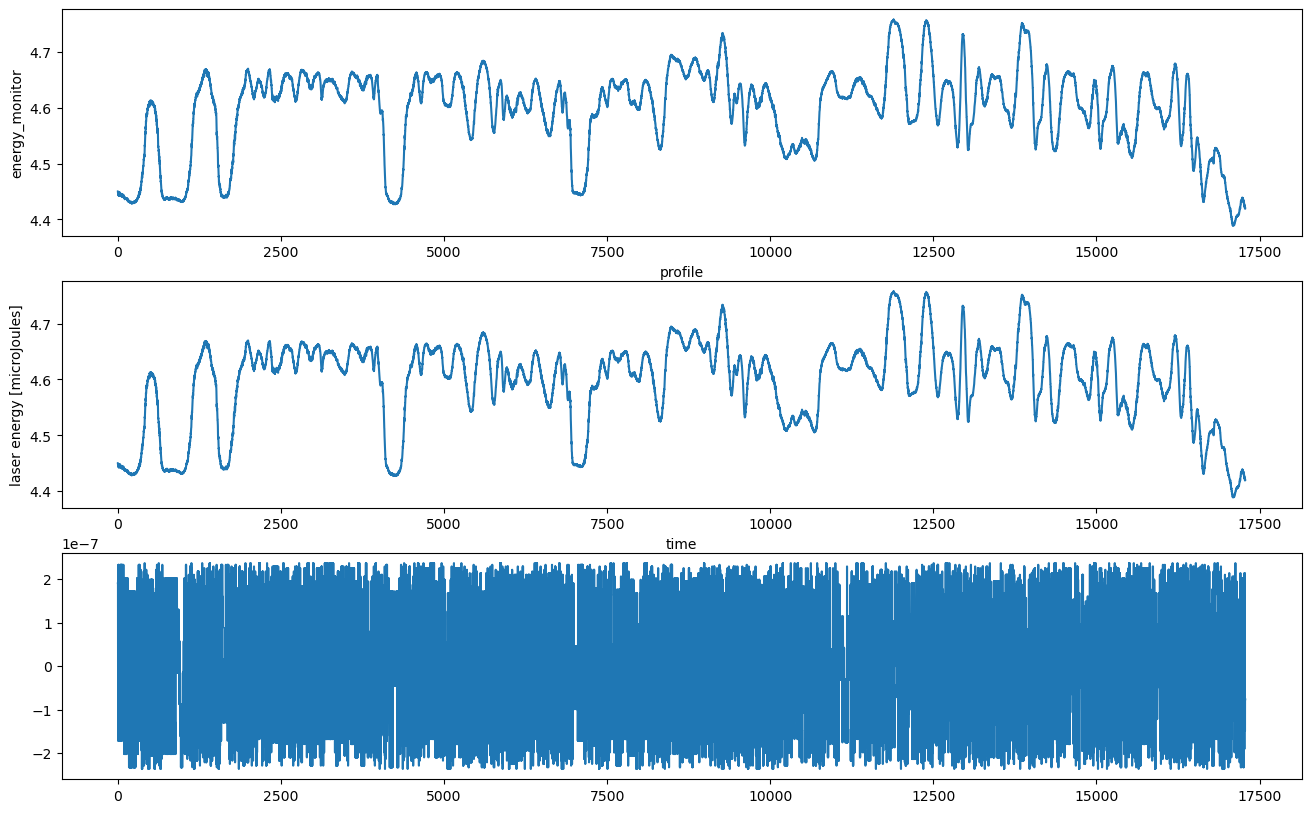

In [32]:
fig, axs= plt.subplots(3,1,figsize=(16,10))
(ds_raw.energy_monitor / 1000).plot(ax=axs[0])
ds_ingested.energy.plot(ax=axs[1])

vals = (ds_raw.energy_monitor.values/1000 - ds_ingested.energy.values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

# nshots, rep_rate ingestion

+ nshots : `ds_raw.shots_sum.values`
+ rep_rate : `ds_raw.trigger_frequency.values`

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


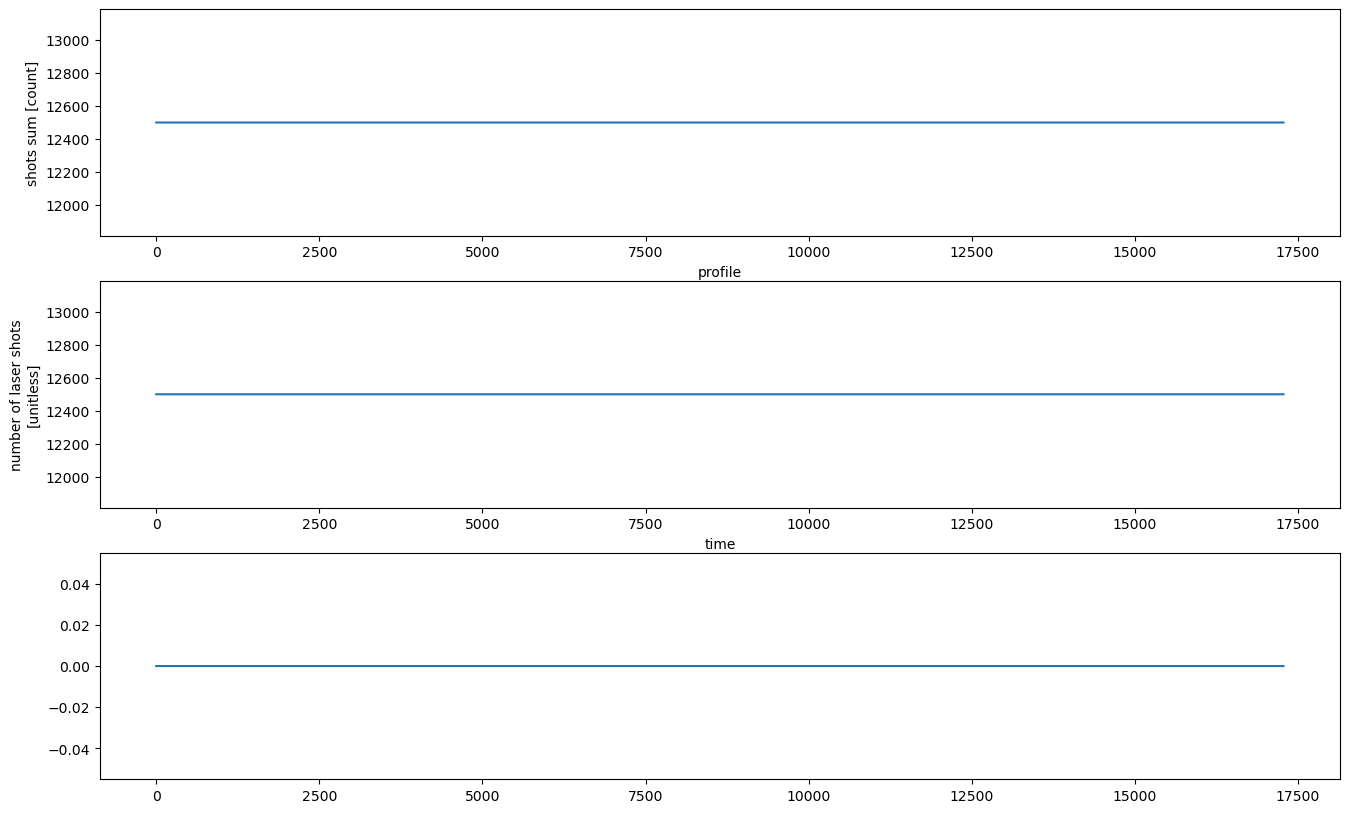

In [35]:
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw.shots_sum.plot(ax=axs[0])
ds_ingested.nshots.plot(ax=axs[1])

vals = (ds_raw.shots_sum.values - ds_ingested.nshots.values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

difference: max = 0.0000000000000000
difference: min = 0.0000000000000000


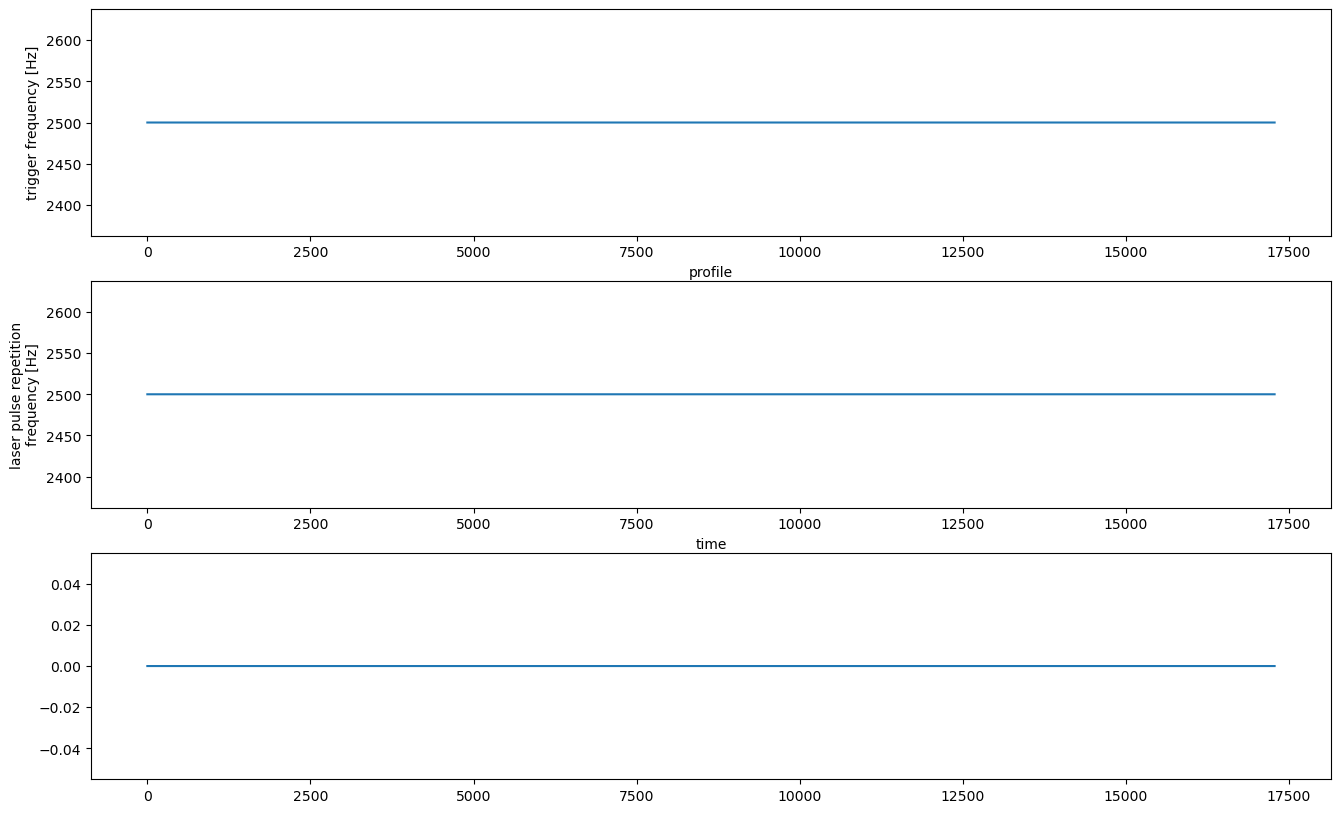

In [37]:
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_raw.trigger_frequency.plot(ax=axs[0])
ds_ingested.rep_rate.plot(ax=axs[1])

vals = (ds_raw.trigger_frequency.values - ds_ingested.rep_rate.values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

# temperatures ingestion

+ temp_detector : `ds_raw.temp_0.values / 100` : NOTE -- has an error of ~O(5e-7)
+ temp_telescope : `ds_raw.temp_2.values / 100` : NOTE -- has an error of ~O(5e-7)
+ temp_laser : `ds_raw.temp_3.values / 100` : NOTE -- has an error of ~O(5e-7)

The error found is in line with the float64 to float 32 conversion accuracy

## temp_detector, temp_0

difference: max = 0.0000004577636723
difference: min = -0.0000004577636723


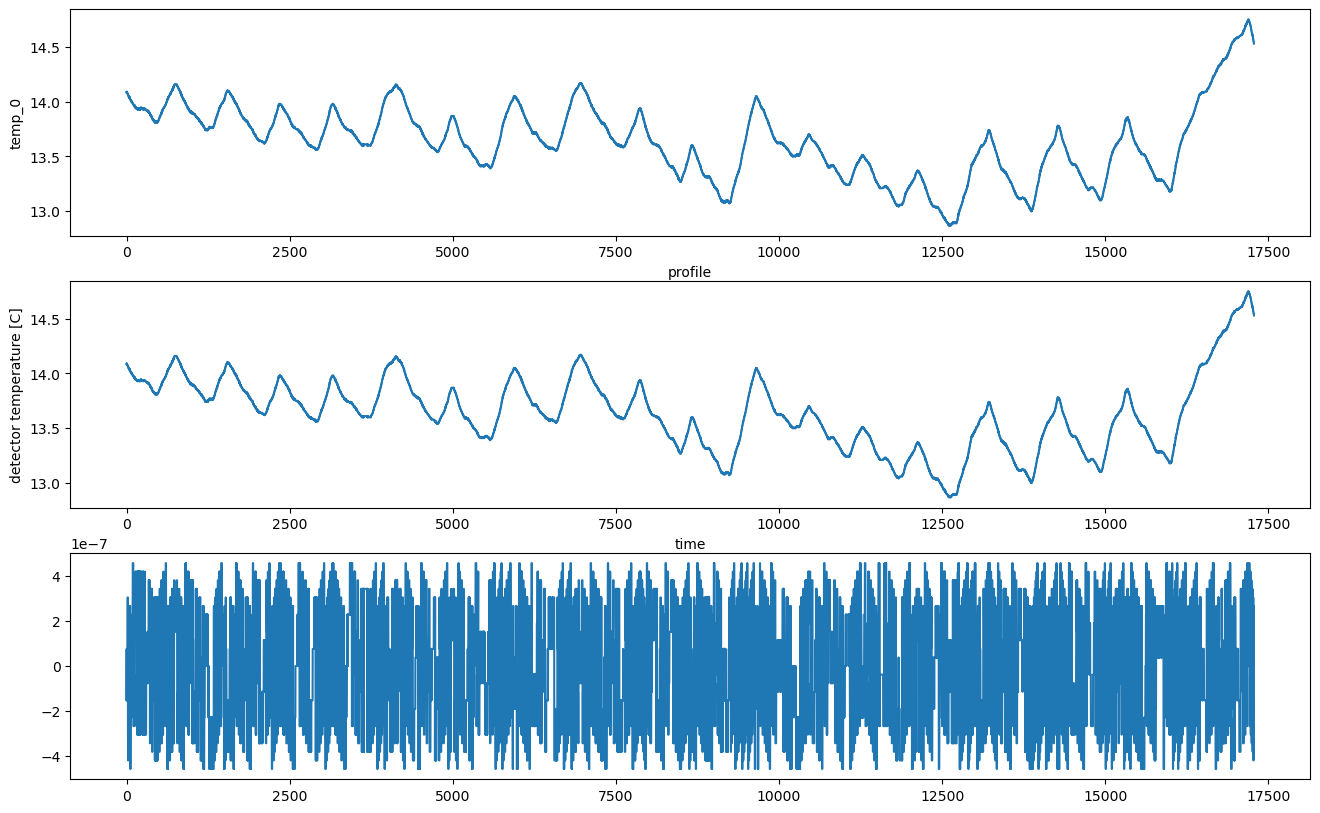

In [40]:
fig, axs= plt.subplots(3,1,figsize=(16,10))
(ds_raw.temp_0 / 100).plot(ax=axs[0])
ds_ingested.temp_detector.plot(ax=axs[1])

vals = (ds_raw.temp_0.values / 100 - ds_ingested.temp_detector.values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

## temp_telescope, temp_2

difference: max = 0.0000004577636723
difference: min = -0.0000004577636723


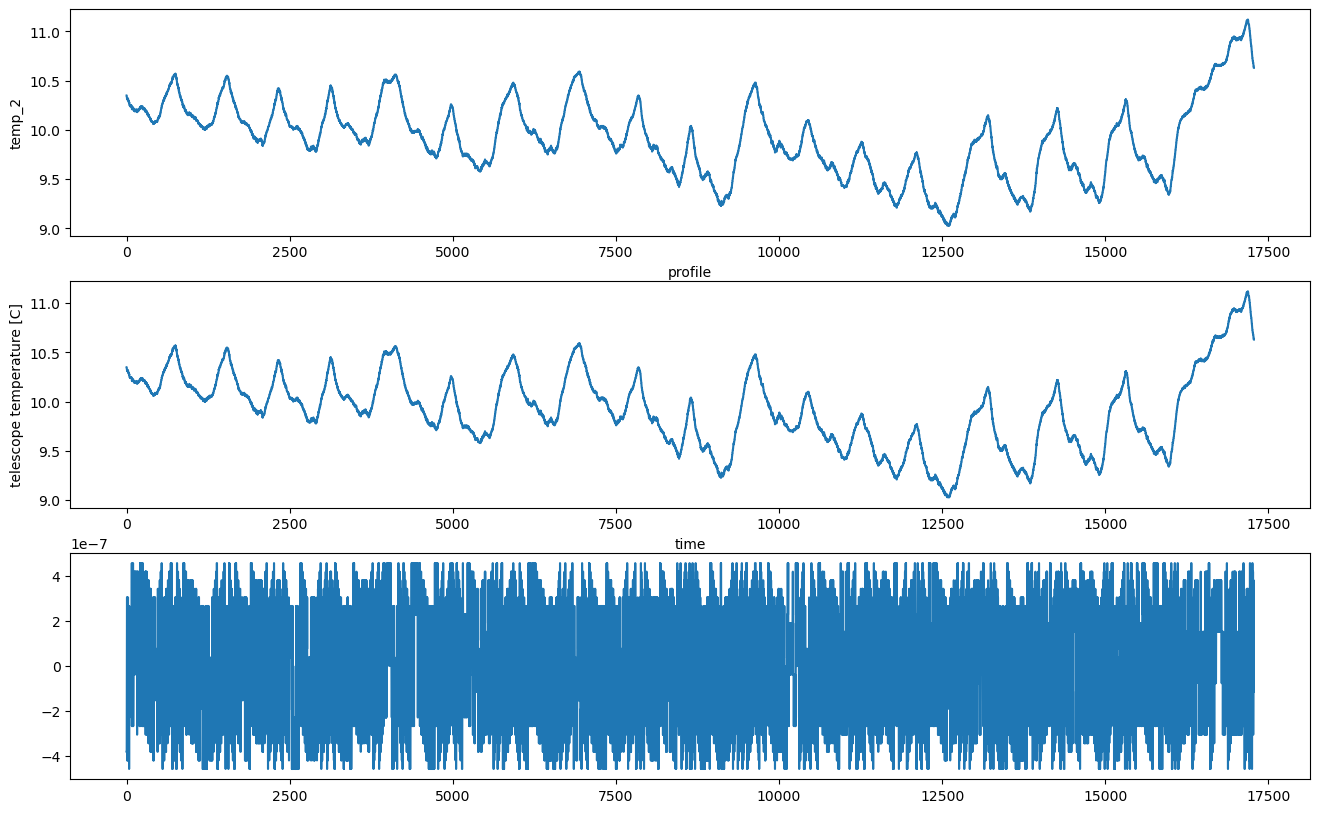

In [41]:
fig, axs= plt.subplots(3,1,figsize=(16,10))
(ds_raw.temp_2 / 100).plot(ax=axs[0])
ds_ingested.temp_telescope.plot(ax=axs[1])

vals = (ds_raw.temp_2.values / 100 - ds_ingested.temp_telescope.values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

## temp_laser, temp_3

difference: max = 0.0000004577636723
difference: min = -0.0000004577636723


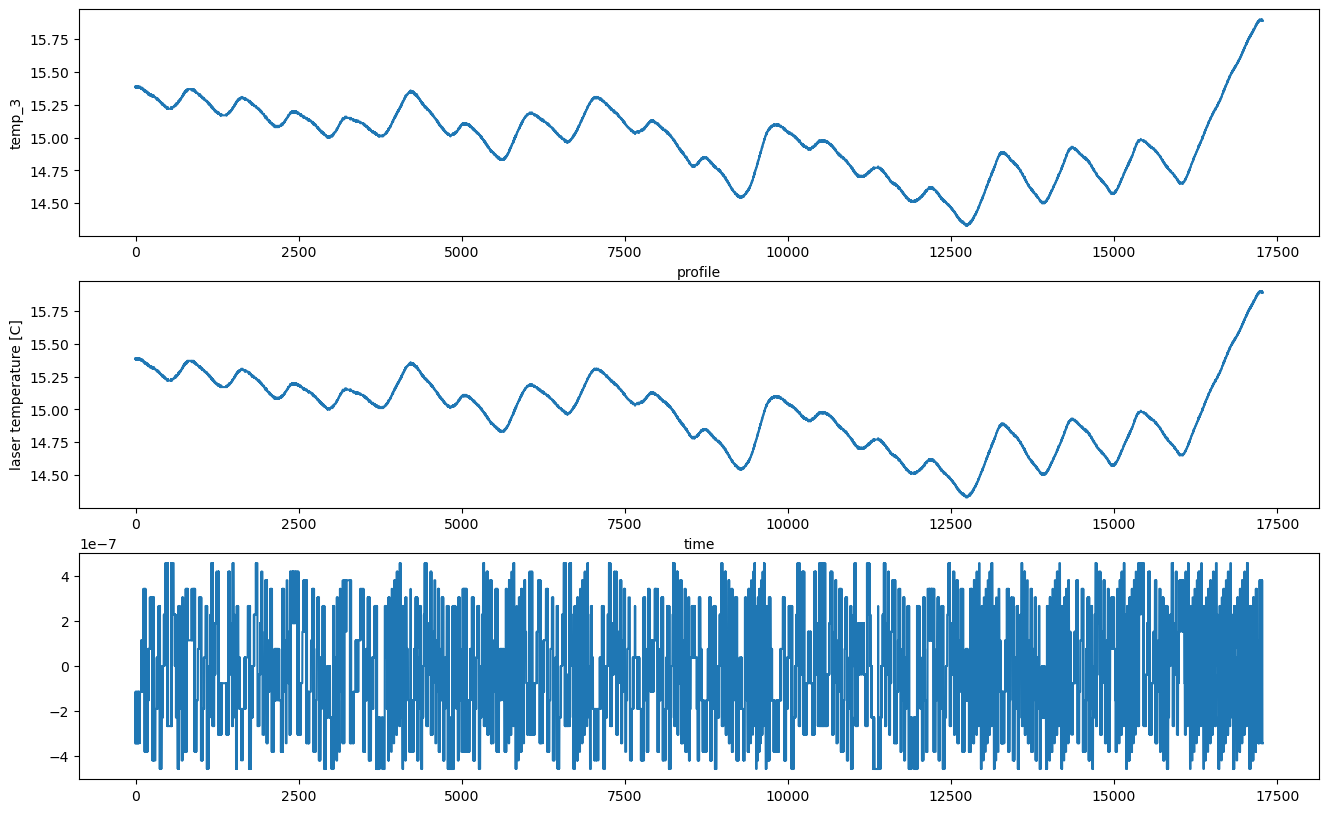

In [42]:
fig, axs= plt.subplots(3,1,figsize=(16,10))
(ds_raw.temp_3 / 100).plot(ax=axs[0])
ds_ingested.temp_laser.plot(ax=axs[1])

vals = (ds_raw.temp_3.values / 100 - ds_ingested.temp_laser.values)
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')

# hour ingestion

difference: max = 0.0000000000000000
difference: min = -0.0005555555690080


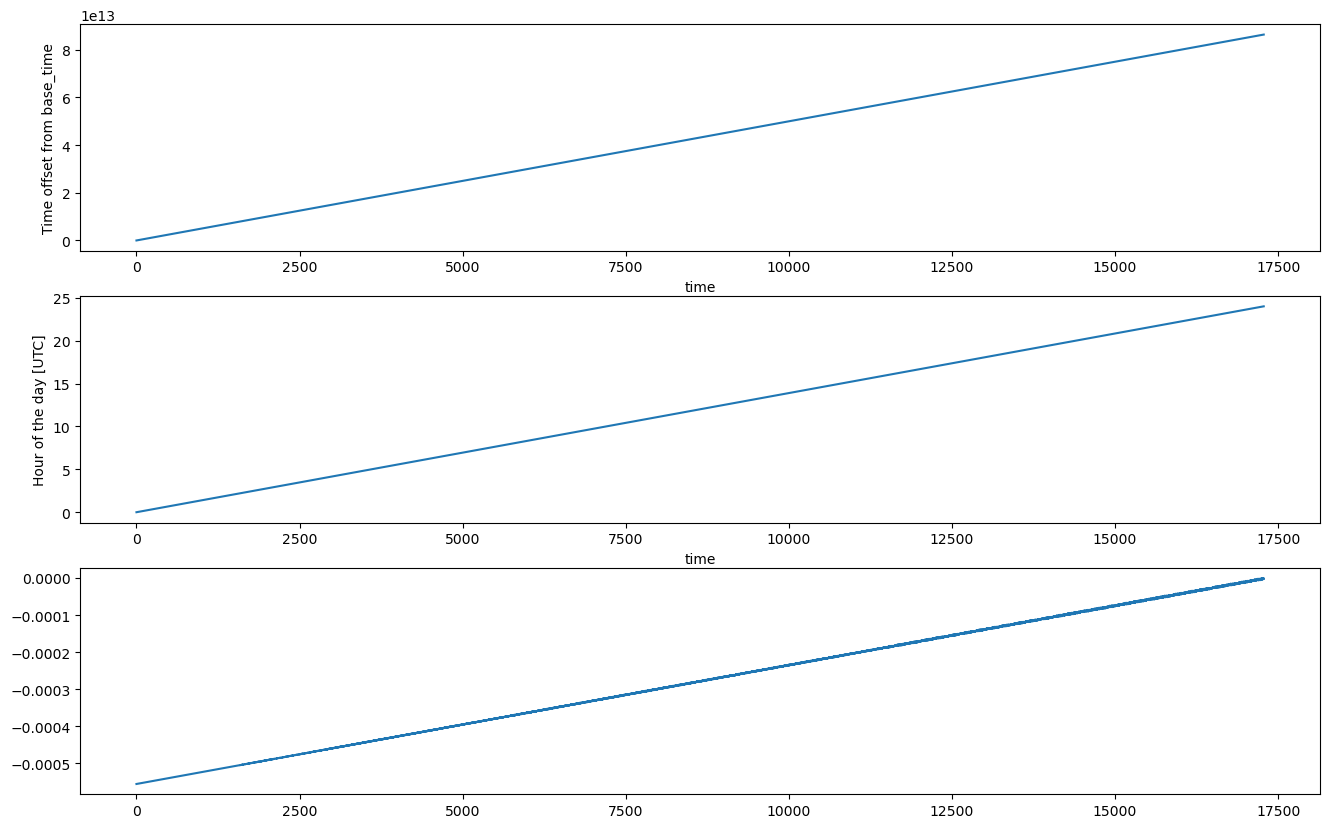

In [65]:
fig, axs= plt.subplots(3,1,figsize=(16,10))
ds_ingested.time_offset.plot(ax=axs[0])
ds_ingested.hour.plot(ax=axs[1])

vals = (ds_ingested.time_offset.values.astype('float32') / 3599916859392.0000000000000000 - (ds_ingested.hour.values) )
axs[2].plot(vals)
print(f'difference: max = {np.max(vals):.16f}')
print(f'difference: min = {np.min(vals):.16f}')